# Sign Language Recognition (ASL) using CNN + LSTM

In [31]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Input


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)


def augment_sequence_batch(sequences, labels):
    augmented_sequences = []
    augmented_labels = []

    for seq, label in zip(sequences, labels):
        aug_seq = []
        for frame in seq:
            frame = frame.reshape((1, 64, 64, 3))
            aug_iter = datagen.flow(frame, batch_size=1)
            aug_frame = next(aug_iter)[0] 
            aug_seq.append(aug_frame)
        augmented_sequences.append(np.array(aug_seq))
        augmented_labels.append(label)

    return np.array(augmented_sequences), np.array(augmented_labels)

 
augmented_X, augmented_y = augment_sequence_batch(X_train, y_train)


X_train_augmented = np.concatenate((X_train, augmented_X), axis=0)
y_train_augmented = np.concatenate((y_train, augmented_y), axis=0)

print(f'New training data: {X_train_augmented.shape}, Labels: {y_train_augmented.shape}')


New training data: (232, 10, 64, 64, 3), Labels: (232,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [34]:
model = Sequential()
model.add(Input(shape=(time_steps, IMG_HEIGHT, IMG_WIDTH, 3)))

model.add(TimeDistributed(Conv2D(32, (3,3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2,2))))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(64))

model.add(Dense(len(label_map), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_15                  │ (None, 10, 62, 62, 32)      │             896 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_16                  │ (None, 10, 31, 31, 32)      │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_17                  │ (None, 10, 30752)           │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │       7,889,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 29)                  │           1,885 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,891,933 (30.11 MB)

 Trainable params: 7,891,933 (30.11 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 654ms/step - accuracy: 0.1472 - loss: 3.1089 - val_accuracy: 0.1034 - val_loss: 3.3053
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step - accuracy: 0.1149 - loss: 3.1183 - val_accuracy: 0.0690 - val_loss: 3.2060
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 634ms/step - accuracy: 0.1626 - loss: 3.0708 - val_accuracy: 0.1034 - val_loss: 3.2814
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 641ms/step - accuracy: 0.2042 - loss: 3.0007 - val_accuracy: 0.1379 - val_loss: 3.1314
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step - accuracy: 0.1818 - loss: 2.8978 - val_accuracy: 0.1379 - val_loss: 3.1198
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 639ms/step - accuracy: 0.3886 - loss: 2.8328 - val_accuracy: 0.1034 - val_loss: 3.0389
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 661ms/step - accuracy: 0.4732 - loss: 2.7120 - val_accuracy: 0.2069 - val_loss: 2.9888
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 639ms/step - accuracy: 0.4155 - loss: 2.6687 - val_accuracy: 0.1724 - val_loss:

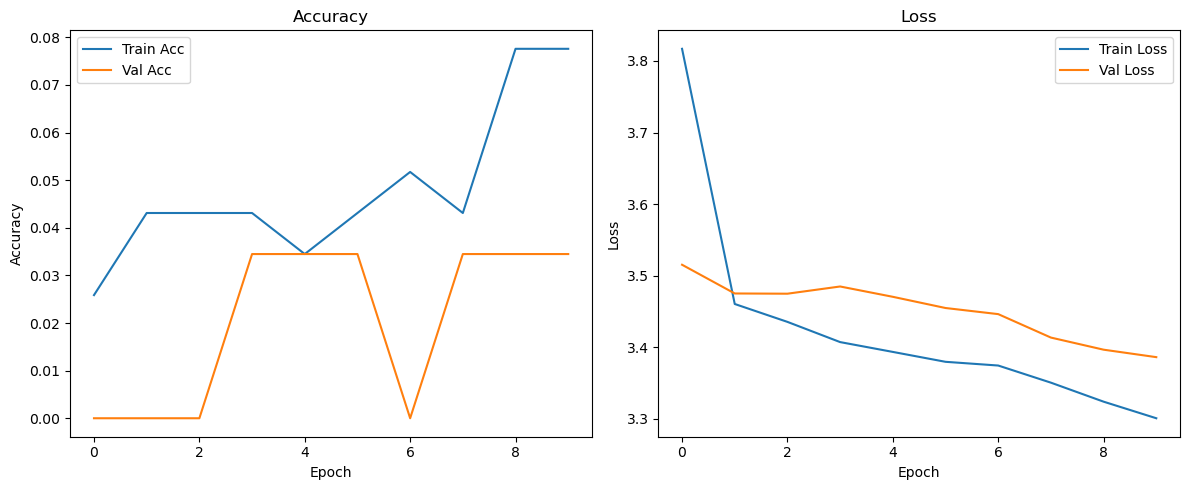

In [37]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
